# Clustering des patients

In [ ]:
import pandas as pd
from fonctions import * #fonction ``patients``

bt = pd.read_csv('matrice_counts_BT_only.csv', sep=',', low_memory=False)
bt.set_index('Unnamed: 0', inplace=True)
bt.head()

,AAACCCAGTCTCAGAT.1_1,AAACCCAGTGTCCGGT.1_1,AAACCCATCGGCTATA.1_1,AAACGAAAGAGCCCAA.1_1,AAACGAATCTTACGTT.1_1,AAACGCTAGGCCCAAA.1_1,AAAGAACCACTGGACC.1_1,AAAGAACGTAGAAACT.1_1,AAAGGATAGCACCGTC.1_1,AAAGGATAGGCCTGCT.1_1,...,TTTACTGAGAATAGGG.1_43,TTTACTGCACTTACGA.1_43,TTTATGCTCACGATGT.1_43,TTTATGCTCCAAATGC.1_43,TTTGCGCAGTCTCGGC.1_43,TTTGCGCTCACAAACC.1_43,TTTGGTTAGAACTGTA.1_43,TTTGGTTGTTGCGCAC.1_43,TTTGGTTTCGGCGGTT.1_43,TTTGTCACATGCCTAA.1_43
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
Bt_Ot_matrix,BT,BT,BT,BT,BT,BT,BT,BT,BT,BT,...,BT,BT,BT,BT,BT,BT,BT,BT,BT,BT
patient_matrix,14,14,14,14,14,14,14,14,14,14,...,38,38,38,38,38,38,38,38,38,38
sample_matrix,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,scrCMA036,...,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144,sc5rCMA144
AL627309.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL669831.5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [12]:
patient15 = patients(15, bt)
patient15 = patient15.T

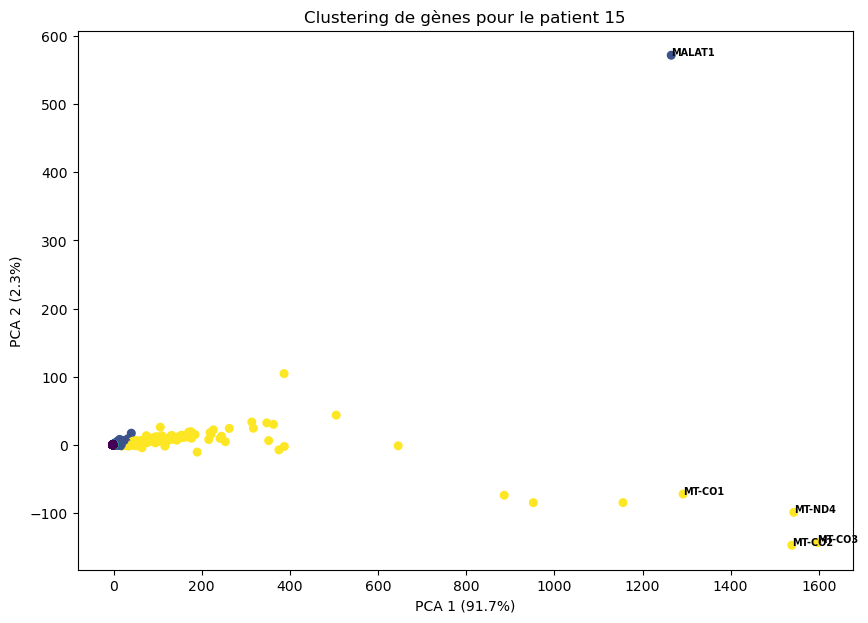

In [13]:
a, b, c = GMM_clustering(patient15, n_components=5)
visualisation_clusters(a, b, c,patient=15)

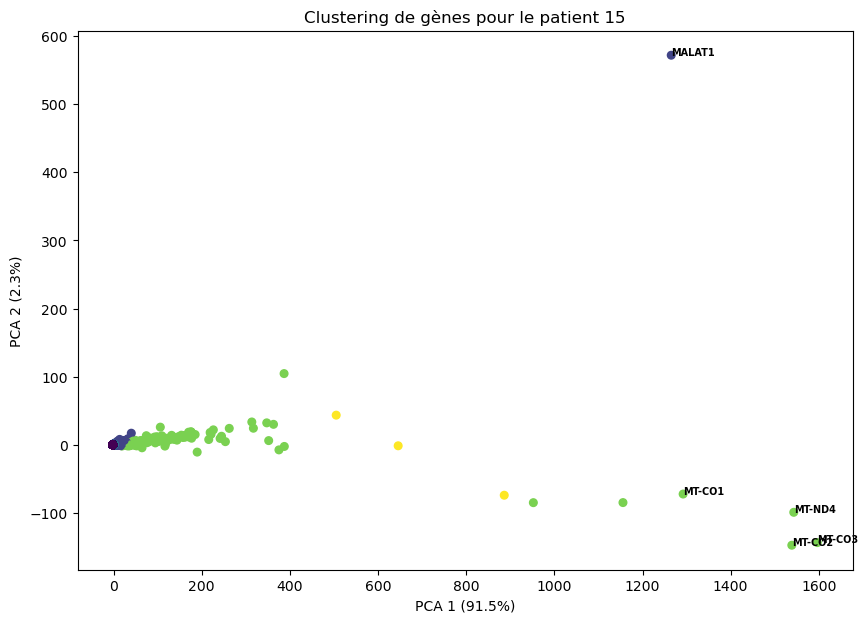

In [14]:
a, b, c = GMM_clustering(patient15, n_components=6)
visualisation_clusters(a, b, c,patient=15)

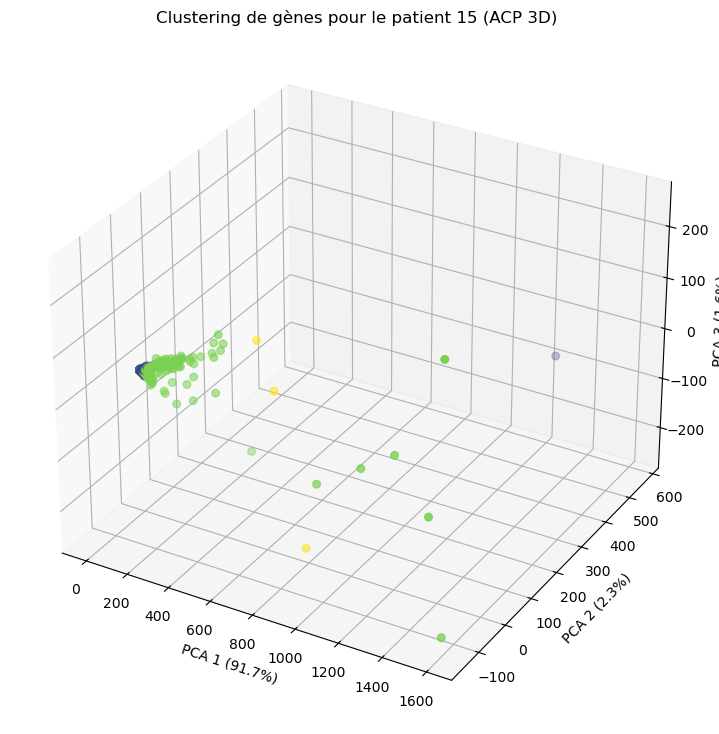

In [32]:
from mpl_toolkits.mplot3d import Axes3D

# Calculer la PCA sur 3 composantes principales
pca_3d = PCA(n_components=3)
b_3d = pca_3d.fit_transform(StandardScaler().fit_transform(patient15.iloc[:, :-1]))

labels = patient15['Cluster'].astype(int).values

fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(b_3d[:, 0], b_3d[:, 1], b_3d[:, 2], c=labels, cmap='viridis', s=30)

ax.set_xlabel(f'PCA 1 ({pca_3d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PCA 2 ({pca_3d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_zlabel(f'PCA 3 ({pca_3d.explained_variance_ratio_[2]*100:.1f}%)')
ax.set_title("Clustering de gènes pour le patient 15 (ACP 3D)")
plt.show()

In [22]:
# Compter le nombre de points dans chaque cluster pour patient15
cluster_counts = patient15['Cluster'].value_counts()
print(cluster_counts)

Cluster
3    8711
0    7099
2    6265
1     665
4     154
5       3
Name: count, dtype: int64


In [23]:
patient15

,AAACCCAGTGCAACGA.1_3,AAACGAAAGCAACAAT.1_3,AAACGAAGTCTAACGT.1_3,AAACGCTTCTCATAGG.1_3,AAAGAACCAAATGGCG.1_3,AAAGGATGTTGTGTTG.1_3,AAAGGTAAGCCTGTCG.1_3,AAAGGTAAGTGTACCT.1_3,AAAGTGAGTCTTACAG.1_3,AACAAAGGTCATCGGC.1_3,...,TTTCGATAGAGCATCG.1_3,TTTCGATCACCTGTCT.1_3,TTTCGATTCCTTGGAA.1_3,TTTGACTTCGCAATGT.1_3,TTTGACTTCTCAGGCG.1_3,TTTGGAGAGCAATAGT.1_3,TTTGGAGTCTCGTTTA.1_3,TTTGGTTTCTGTCCGT.1_3,TTTGTTGTCGGTAAGG.1_3,Cluster
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AL627309.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
AL669831.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3
LINC00115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
FAM41C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
SAMD11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AP000311.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
AC002480.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
TRBV7-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
sum = patient15.drop(columns='Cluster').sum(axis=1)
sum

Unnamed: 0
AL627309.1      0.0
AL669831.5     60.0
LINC00115      11.0
FAM41C          8.0
SAMD11          2.0
               ... 
AP000311.1      0.0
AC002480.3      0.0
TRBV7-4         0.0
AC068775.1      0.0
IGHV3OR15-7     0.0
Length: 22897, dtype: float64

In [ ]:
zero_sum = (sum == 0).sum()
print(f"Nombre de lignes avec une somme de zéros: {zero_sum}")

Number of lines with sum == 0: 6713


In [ ]:
sum.sort_values(ascending=False, inplace=True)
sum

Unnamed: 0
MT-CO3         835998.0
MT-CO2         802678.0
MT-ND4         773593.0
MT-CO1         662307.0
MALAT1         602075.0
                 ...   
AC100835.1          0.0
DNAH8               0.0
AC084035.1          0.0
CPLX3               0.0
IGHV3OR15-7         0.0
Length: 22897, dtype: float64

In [4]:
liste_patients = [14, 15, 16, 17, 18, 20, 21, 22, 23, 25, 26, 28, 29, 32, 33, 34, 36, 37, 38]

#on enleve le patient 20 car il n as pas assez de données
liste_patients.remove(20)


Patients a enlever car trop peu de données

In [5]:
liste_patients.remove(18)
liste_patients.remove(28)
liste_patients.remove(32)
liste_patients.remove(33)
liste_patients.remove(34)
liste_patients

[14, 15, 16, 17, 21, 22, 23, 25, 26, 29, 36, 37, 38]

In [6]:
liste_clusters = [4, 5, 4, 4, 5, 4, 5, 4, 3, 3, 3, 4, 3]

In [ ]:
import numpy as np
import math

def plot_cluster(bt, liste_patients, lliste_clusters, n_extremes=5):
    n = len(liste_patients)
    rows = math.ceil(n / 3)  # Grille 3 colonnes
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axes = axes.flatten()

    for idx, (num_patient, n_clusters) in enumerate(zip(liste_patients, lliste_clusters)):
        # 1. Données
        mat = patients(num_patient, bt).T.astype(float)  # cellules x gènes
        #mat = patients(num_patient, bt)  # cellules x gènes
        gene_names = patients(num_patient, bt).index     # noms des gènes

        # 2. Normalisation
        scaler = StandardScaler()
        mat_scaled = scaler.fit_transform(mat)

        # 3. PCA
        pca = PCA(n_components=2)
        mat_pca = pca.fit_transform(mat_scaled)

        # 4. Clustering GMM
        gmm = GaussianMixture(n_components=n_clusters, random_state=0)
        labels = gmm.fit_predict(mat_pca)

        # 5. Affichage
        ax = axes[idx]
        scatter = ax.scatter(mat_pca[:, 0], mat_pca[:, 1], c=labels, cmap='tab10', s=10)

        # 6. Annotations des points les plus extrêmes
        distances = np.linalg.norm(mat_pca, axis=1)
        idx_extremes = np.argsort(distances)[-n_extremes:]
        for i in idx_extremes:
            gene = mat.index[i] # if i < len(gene_names) else f"gène_{i}"
            ax.annotate(gene, (mat_pca[i, 0], mat_pca[i, 1]), fontsize=7, fontweight='bold')

        # 7. Titres et labels
        var_ratio = pca.explained_variance_ratio_
        xlabel = f"PCA 1 ({var_ratio[0]*100:.1f}%)"
        ylabel = f"PCA 2 ({var_ratio[1]*100:.1f}%)"
        ax.set_title(f'Patient {num_patient} - {n_clusters} clusters')
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.grid(True)

    # Masquer les subplots vides
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.tight_layout()
    plt.show()


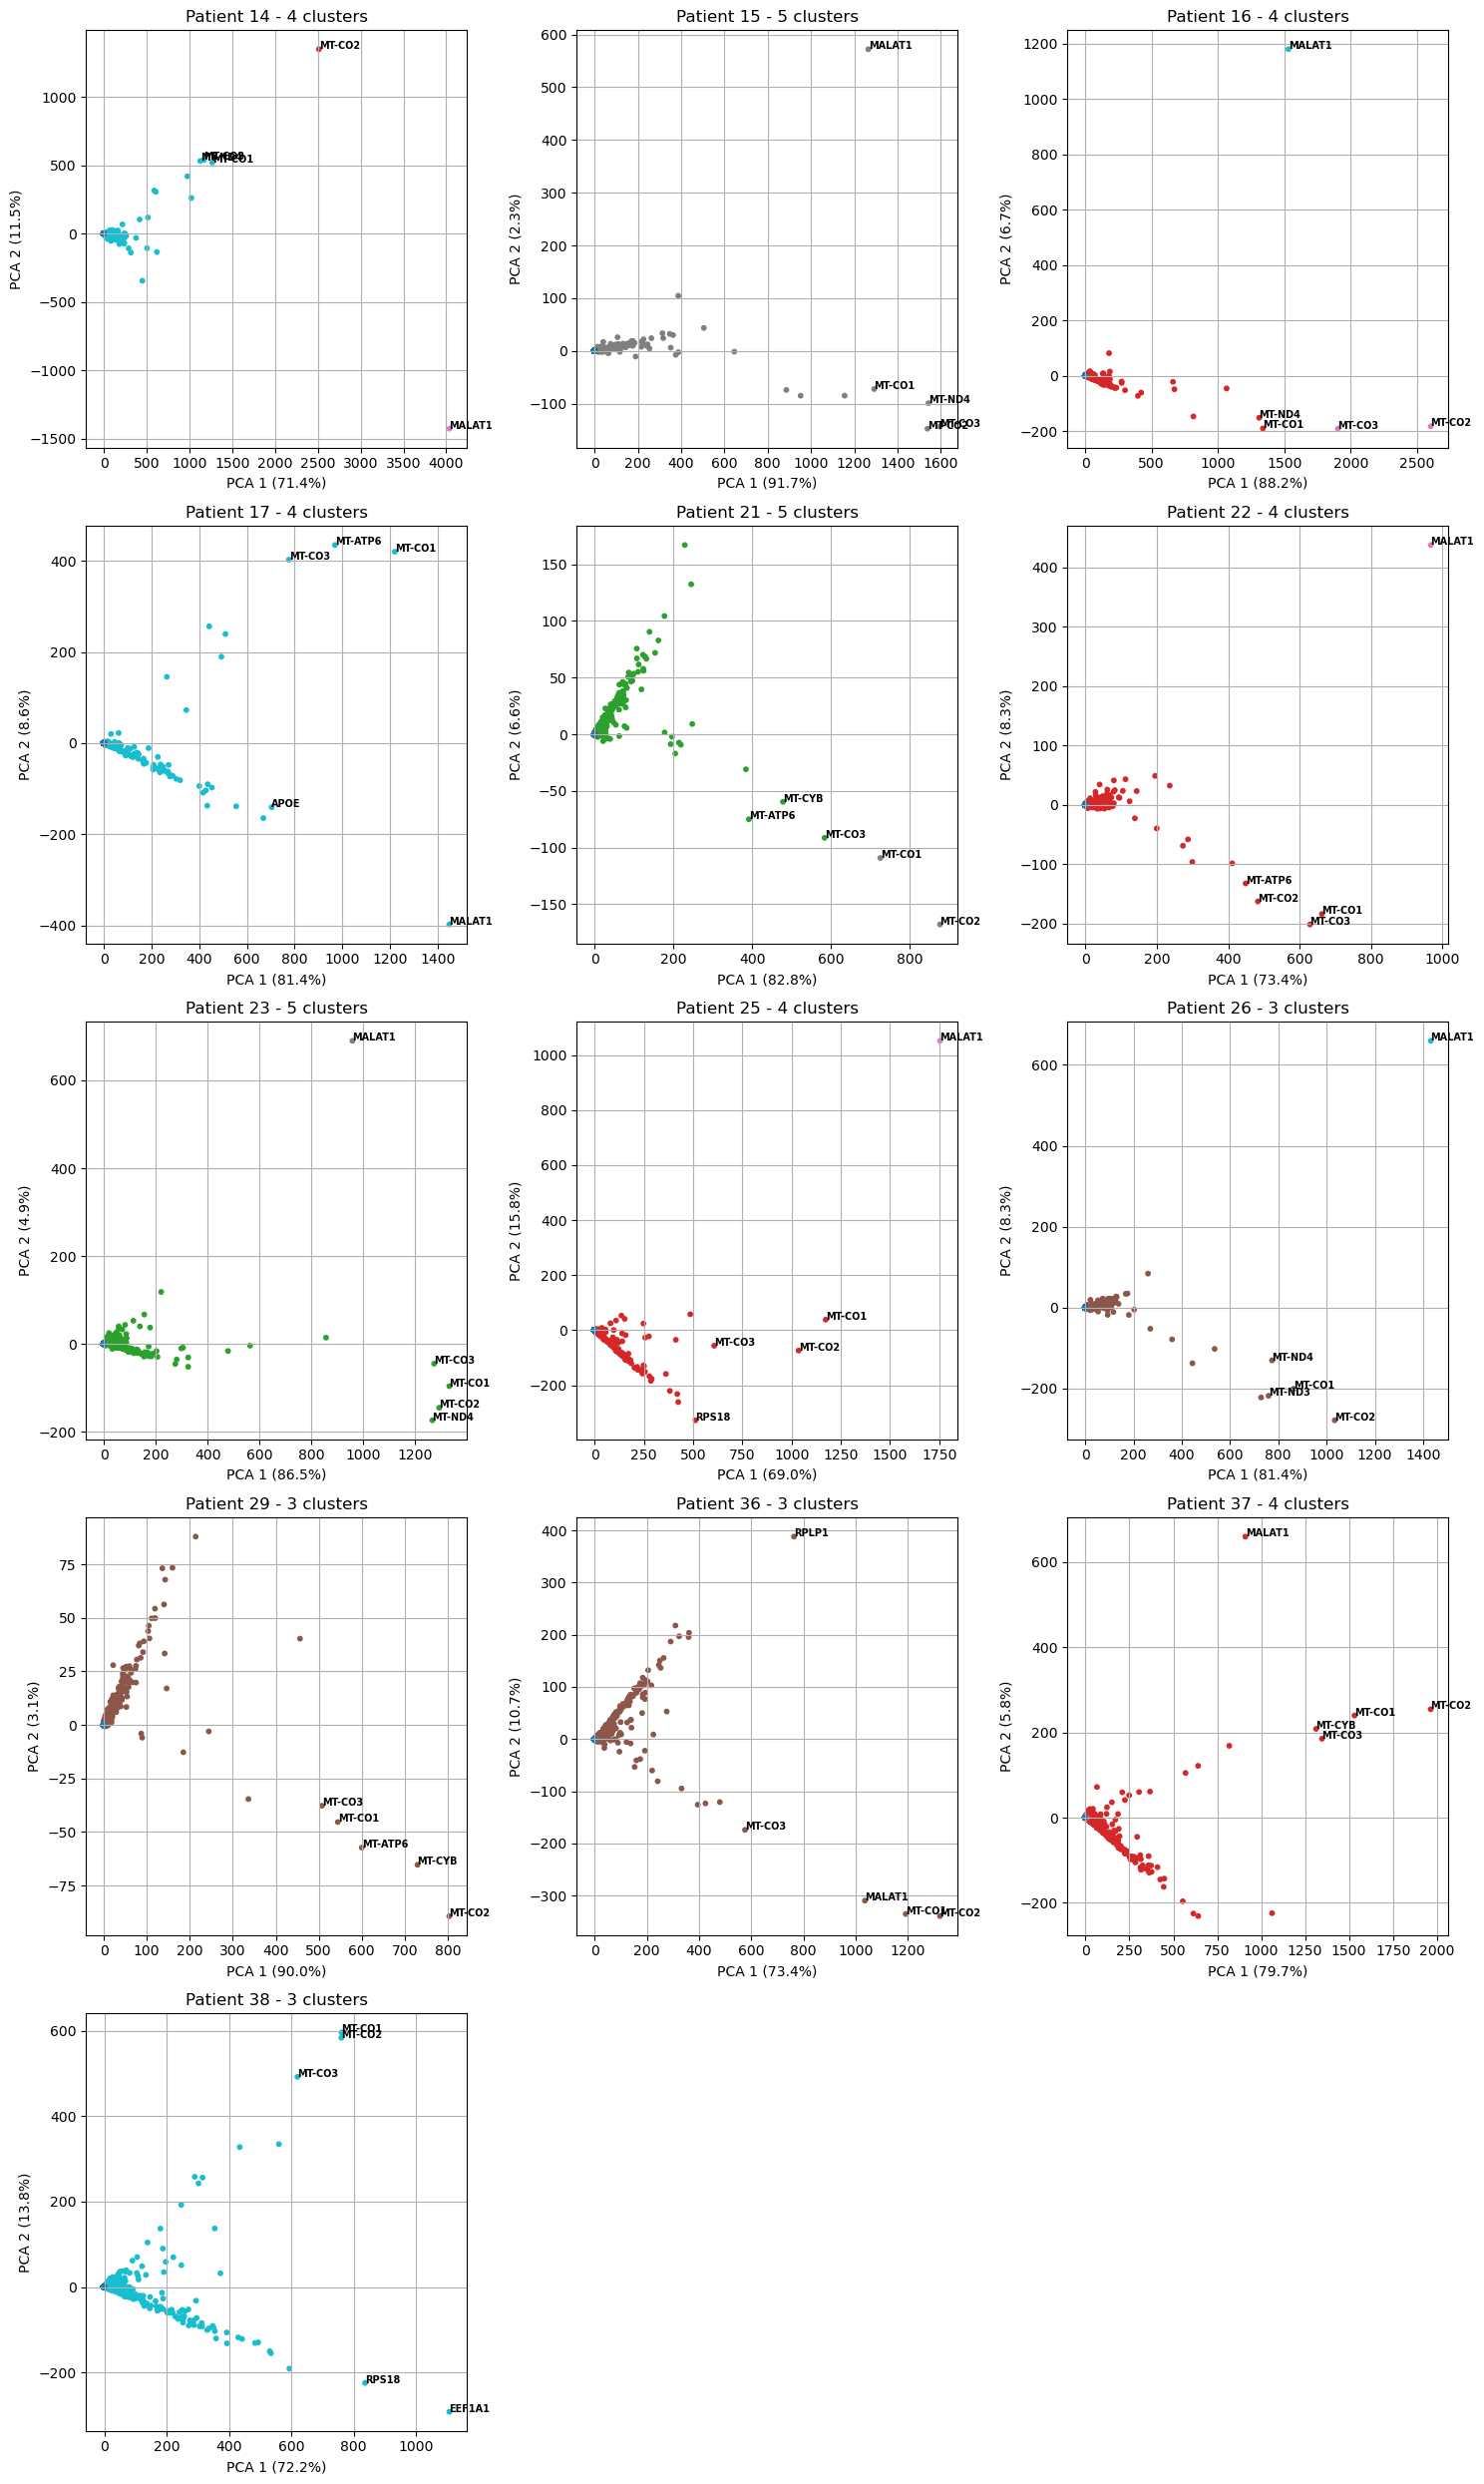

In [ ]:
plot_cluster(bt, liste_patients, liste_clusters, n_extremes=5)